## long.log - analysis of simulator data 
the dbc simulator is configured to send a log file recorded on 5/12/2018 for one hour for dbc cl66 loco 66054 . 


the loco was involved in lowspeed freight operations and shows several periods of varying groundspeed , engine revs, throttle solenoid operations 

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
%matplotlib inline
pd.set_option('display.max_rows', None)


In [4]:
# read in JSON formatted annotated test file
df_log = pd.read_json('long.json', lines=True)
## extract the json from the payload   
df_frames = pd.concat([pd.DataFrame(json_normalize(x,'frames',['vehicleNumber','receiveTimeMs','rmdTimeMs','pktId'], errors='ignore',max_level=0)) for x in df_log['payload']], ignore_index=True )

# counts of tag values in the long.log file


In [3]:

# show counts of tag vlues in long file
df_frames.groupby('card')['tag'].value_counts()

card  tag                        
2     CoolantTankLevel                 80
      OilQuality                        2
      OilQualitySensorTemp              2
7     GroundSpeedLocomotive          1137
8     SpeedEngine                    1086
      CurrentMainGenerator            819
      VoltageMainGenerator            777
      BrakingAirPressureBogie1        699
      BrakingAirPressureBogie2        683
      PressureBrakePipe               574
      VoltageBattery                    4
      LevelFuelTank                     3
      AmbTemperature                    2
      Booster1                          2
      Booster2                          2
      PressureOilEngine                 2
      TemperatureEngineWater            2
      TemperatureExhaust-1              2
      TemperatureExhaust-2              2
      TemperatureOilEngine              2
9     AutoBrakeOperation              116
      SolenoidA                        72
      GeneratorField                   36


In [5]:
## pivot to create columns for all discrete values  - fillforward empty columns
cols = df_frames.pivot( columns='tag', values='value') #.fillna(method='ffill')

## add cols to main to get the matching timestamps 
# full = df_frames.merge(cols, left_index=True, right_index=True)

# summarise some specific tags
cols[['GroundSpeedLocomotive','SpeedEngine','CoolantTankLevel']].describe()

tag,GroundSpeedLocomotive,SpeedEngine,CoolantTankLevel
count,1137.000000,1086.000000,80.000000
mean,11.986544,352.464345,63.758257
std,8.202512,127.818063,16.918246
min,0.000000,188.235200,17.736775
25%,4.800000,258.823400,52.631372
50%,10.900000,319.999840,63.216683
75%,20.100000,423.529200,78.294595
max,26.100000,828.234880,98.357450


# some example plots of significant data in the test file

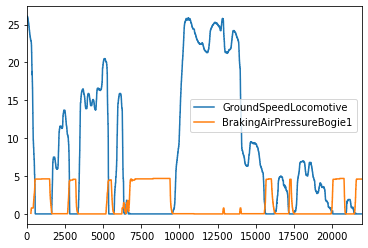

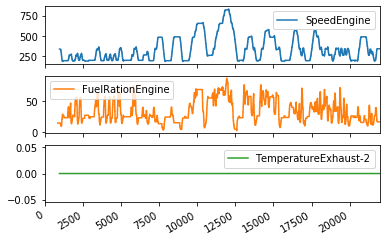

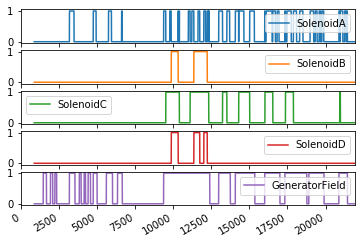

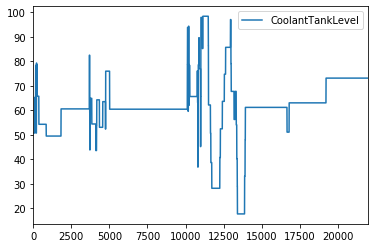

In [7]:
# draw some plots 

ax = plt.gca()
pdata = cols.fillna(method='ffill')

# show 2 tags on same axis
pdata.plot( kind="line",y='GroundSpeedLocomotive', ax=ax)
pdata.plot( kind="line",y='BrakingAirPressureBogie1',ax=ax)


# show 3 tags as subplots
pdata.plot( kind="line", y=['SpeedEngine','FuelRationEngine','TemperatureExhaust-2'], subplots=True)


# plot digital signals for throttle pos calcs
pdata.plot( kind="line", y=[
 'SolenoidA',
 'SolenoidB',
 'SolenoidC',
 'SolenoidD','GeneratorField'] , subplots=True)

pdata.plot( kind="line", y='CoolantTankLevel')
